<a href="https://colab.research.google.com/github/ucheokechukwu/tensorflow-deep-learning/blob/main/01_neutral_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're simplying it to: **predicting a numetrical variable** based on some other combination of variables... predicting a number.

In [1]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.11.0


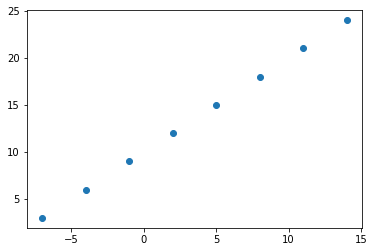

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array ([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it

plt.scatter(X,y);

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo Tensor for our housing price prediction problem
house_info = tf.constant (["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define:
  * the loss function (that calculates how wrong our model is) and 
  * the optimizer (that tells the model how to improve the patterns its learning) and 
  * evaluation metrics (what we can use to rate the performance of the model)

3. Fitting a model - letting the model try to find patterns between X and y.

In [7]:
# Set random seed to have reproducible data
tf.random.set_seed(42)

In [8]:
# 1. Create a model using the Sequential API

model = tf.keras.Sequential ([
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # sgd is stochastic gradient descent or optimzer = "sgd"
              metrics=["mae"]
              ) 

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5) # Epochs is the number of attempts to fit the model

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 14.6348 - mae: 14.6348
Epoch 2/5
1/1 [==============================] - 0s 23ms/step - loss: 14.5023 - mae: 14.5023
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 14.3698 - mae: 14.3698
Epoch 4/5
1/1 [==============================] - 0s 35ms/step - loss: 14.2373 - mae: 14.2373
Epoch 5/5
1/1 [==============================] - 0s 24ms/step - loss: 14.1048 - mae: 14.1048


In [9]:
model.predict([17.0])

1/1 [==============================] - 0s 435ms/step


array([[-2.4870453]], dtype=float32)

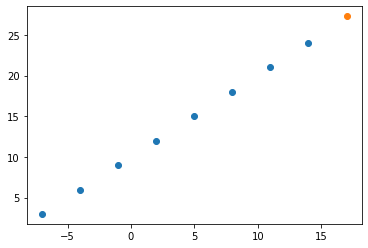

In [10]:
# Check out X and y
plt.scatter(X,y)
plt.scatter(17,27.3)

## How to improve our model

We improve our model but adjusting the steps we took to make the model:

* **Creating the model**: add more layers, increase the number of hidden units(neurons), change the activation functions.
* **Compiling the model**: change the optimization function, change the learning rate.
* **Fitting the model**: Increase the length of training (more epochs) or get more data

In [11]:
# Rebuilding the model

In [12]:
# 1. Create the model
model = tf.keras.Sequential ([
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile (loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Build the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 19.1069 - mae: 19.1069
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 18.8257 - mae: 18.8257
Epoch 3/100
1/1 [==============================] - 0s 49ms/step - loss: 18.5444 - mae: 18.5444
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 18.2632 - mae: 18.2632
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 17.9819 - mae: 17.9819
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 17.7007 - mae: 17.7007
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 17.4194 - mae: 17.4194
Epoch 8/100
1/1 [==============================] - 0s 35ms/step - loss: 17.1382 - mae: 17.1382
Epoch 9/100
1/1 [==============================] - 0s 45ms/step - loss: 16.8569 - mae: 16.8569
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 16.5757 - mae: 16.5757
Epoch 11/100
1/1 [==============================] -

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 312ms/step


array([[29.698225]], dtype=float32)

This test run predicted **29.686462**

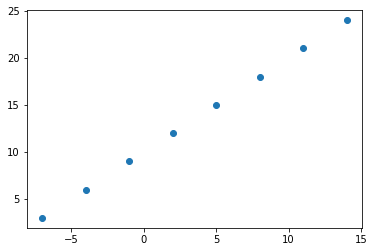

In [14]:
plt.scatter(X,y)

1/1 [==============================] - 0s 164ms/step


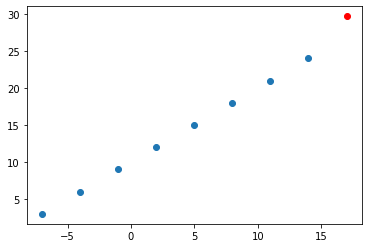

In [15]:
plt.scatter(17, model.predict([17.0]), c="red");
plt.scatter(X,y);

In [16]:
# 2nd change. I want to add an extra layer.


In [17]:
from keras.optimizers.optimizer_v2.gradient_descent import SGD
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["mae"])

# 3. Build the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.3813 - mae: 13.3813
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 13.2937 - mae: 13.2937
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2056 - mae: 13.2056
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 13.1181 - mae: 13.1181
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 13.0310 - mae: 13.0310
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 12.9445 - mae: 12.9445
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 12.8578 - mae: 12.8578
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 12.7708 - mae: 12.7708
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 12.6842 - mae: 12.6842
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 12.5977 - mae: 12.5977
Epoch 11/100
1/1 [==============================] -

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 118ms/step


array([[21.113413]], dtype=float32)

This model predicted **32.888565**

1/1 [==============================] - 0s 88ms/step


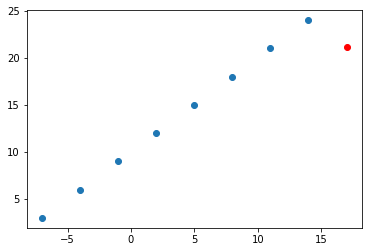

In [19]:
plt.scatter(X,y);
plt.scatter(17.0, model.predict([17.0]), c="red");

Observation: it looks like this second model is **overfitting**. 

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 97ms/step


array([[21.113413]], dtype=float32)

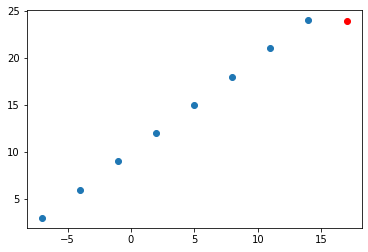

In [21]:
plt.scatter(X,y);
plt.scatter(17,23.905289,c="red")

#### Observation: The **Learning Rate** (on the optimizer) is the most effective/impactful way of improving the model without the danger of overfitting.

### Evaluating a model

In practice a typical workflow for building neural networks:
Build the model -> Fit the model -> Tweak the model -> fit it -> evaluate it -> tweak the model -> fit -> evaluate etc.

When it comes to evaluation, you should visualize... visualize... visualize...

Visualize: 

* The data - what does the data look like?
* The model - how does it look like?
* The model's training - how does it perform while it learns?
* Predictions of the model - how do the predictions line up against the ground truth.

In [22]:
# Make a bigger dataset
X = np.arange(-100.0,100.0,4.0)
X

array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.])

In [23]:
# Make labels for the dataset
y = X + 10

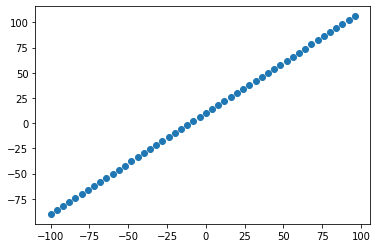

In [24]:
plt.scatter(X,y)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
X_train =tf.constant(X_train)
X_test =tf.constant(X_test)
y_train =tf.constant(y_train)
y_test =tf.constant(y_test)

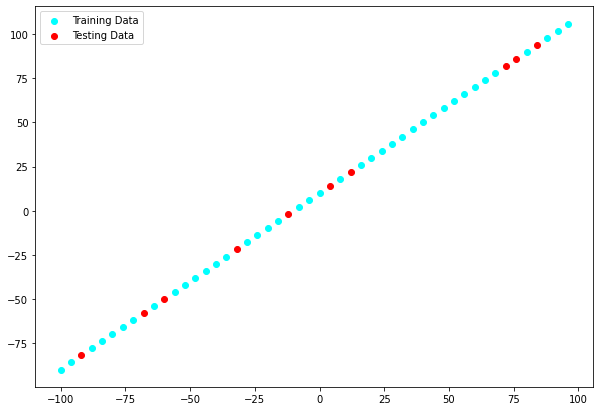

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="cyan", label="Training Data")
plt.scatter(X_test, y_test, c="red", label="Testing Data")
plt.legend();

In [29]:
# Let's create a model which builds automatically by definining the input shape argument on the first layer

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer") 
], name="model_one")

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])

model.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Total params - total number of parameters in the model_selection.

Trainable paramaters - these are the parameters (patterns) the. model can update as it train.s

Non-trainianble parameters - these parameters aren't updated, usually parameters from other models during **transfer learning**. 

**📖 Resource**: For a more indepth overview of the trainable parameters, check out MIT Introduction to Deep Learning.

In [30]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 64.6880 - mae: 64.6880
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 31.5789 - mae: 31.5789
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 31.3092 - mae: 31.3092
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 33.0088 - mae: 33.0088
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 40.0083 - mae: 40.0083
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 11.5623 - mae: 11.5623
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 17.3951 - mae: 17.3951
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 26.9254 - mae: 26.9254
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 40.0279 - mae: 40.0279
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1056 - mae: 10.1056
Epoch 11/100
2/2 [==============================]

In [31]:
model.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


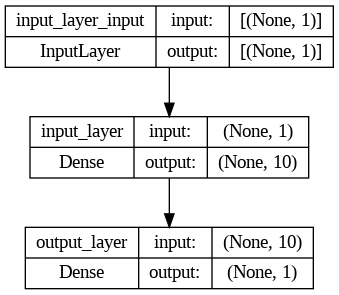

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing predictions:
This is done usually by plotting or comparing ground-truth labels (`y_true` or `y_test`) against predicted values (`y_pred`).

In [33]:
# Make some predictions:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 549ms/step


In [34]:
y_pred

array([[ -9.473934 ],
       [ 69.88425  ],
       [-27.509884 ],
       [  4.9548254],
       [-81.61774  ],
       [-59.974598 ],
       [ 66.277054 ],
       [ 77.098625 ],
       [-52.760212 ],
       [ 12.169205 ]], dtype=float32)

In [35]:
y_pred.ndim

2

In [36]:
# Creating a plotting function


def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions = y_pred):


  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, c="b", label="Training data")
  plt.scatter(test_data,test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

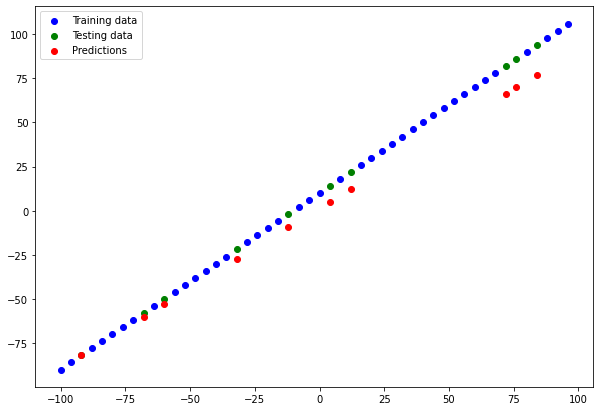

In [37]:
plot_predictions()


### Evaluating model with regression evaluation metrics

Depending on the problem, there are differente evaluation metrics to evaluate model's performance:
* **mae**,
* **mse**

In [38]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.694786, 71.9537  , 57.403954, 51.2     , 90.09419 , 72.77968 ,
       70.51082 , 74.839455, 68.05613 , 51.2     ], dtype=float32)>

In [39]:
y_test.shape

TensorShape([10])

In [40]:
y_pred.shape

(10, 1)

`y_test` has an extra dimension so we should `tf.squeeze()` it.

In [41]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(tf.constant(y_pred)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.571693>

In [42]:
# Calculate the mean squared error

tf.metrics.mean_squared_error (y_true = y_test,
                               y_pred = tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=106.89272>

In [43]:
# Functions for MAE and MSE

def mae(y_true, y_preds):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(tf.constant(y_preds)))

def mse(y_true, y_preds):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(tf.constant(y_preds)))

### How do we improve our model?
1. Get more data (more opportunities to learn patterns)
2. Make models larger (using a more complex model - more layers, more nodes (hidden units))
3. Train for longer (more epochs)

### "Experiment... experiment... experiment..."

* 3 model experiments:

1. `model_1` - baseline, one layer trained for 100 epochs.
2. `model_2` - two layers, trained for 100 epochs
3. `model_3` - two layers, trained for 500 epochs

**Build `model_1`**

In [44]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer", input_shape=[1])
], name="model_1")

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

model_1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 22ms/step - loss: 123.8523 - mae: 123.8523
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 79.5338 - mae: 79.5338
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 32.4512 - mae: 32.4512
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9197 - mae: 15.9197
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.4441 - mae: 10.4441
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 12.5290 - mae: 12.5290
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 10.0254 - mae: 10.0254
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 10.0614 - mae: 10.0614
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2002 - mae: 10.2002
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 9.7995 - mae: 9.7995
Epoch 11/100
2/2 [==============================] - 0

In [46]:
def prediction_function (model, 
                         X_test=X_test,
                         y_true=y_test):
  
  """Function for evaluating the model. 
  Prints the data and reports the MAE & MSE.
  Return the predicted labels.
  """
  y_pred = model.predict(X_test)
  plt.scatter(X_train, y_train, c="b", label="Training Data")
  plt.scatter(X_test, y_test, c="g", label="Test Data")
  plt.scatter(X_test, y_pred, c="r", label="Predictions")
  plt.legend();
  mae_ = mae(y_true, y_pred).numpy()
  mse_ = mse(y_true, y_pred).numpy()
  print(f"The MAE is: {mae_}")
  print(f"The MSE is: {mse_}")
  return (y_pred, mae_, mse_)

1/1 [==============================] - 0s 83ms/step
The MAE is: 19.013839721679688
The MSE is: 515.9591674804688


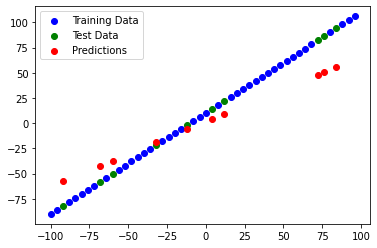

In [47]:
y_pred_1, mae_1, mse_1 = prediction_function(model_1, X_test, y_test)

In [48]:
y_pred_1

array([[ -6.2038107],
       [ 50.56121  ],
       [-19.104952 ],
       [  4.1171026],
       [-57.80838  ],
       [-42.327007 ],
       [ 47.980984 ],
       [ 55.72167  ],
       [-37.166553 ],
       [  9.277559 ]], dtype=float32)

**Build `model_2`** 
*(adding 2 layers and 10 hidden units)*

In [49]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer", input_shape=[1]),
    tf.keras.layers.Dense(1, name="hidden_layer")
], name="model_2")

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 68.2131 - mae: 68.2131
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 37.8057 - mae: 37.8057
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 33.0942 - mae: 33.0942
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.5556 - mae: 14.5556
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2667 - mae: 14.2667
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 22.7915 - mae: 22.7915
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.7189 - mae: 9.7189
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1184 - mae: 10.1184
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4275 - mae: 10.4275
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 17.2181 - mae: 17.2181
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 60ms/step
The MAE is: 8.530996322631836
The MSE is: 73.1279067993164


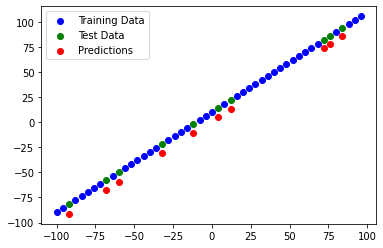

In [51]:
y_pred_2, mae_2, mse_2 = prediction_function(model_2, X_test, y_test)

**Build `model_3`**
*(2 layers, trained for 500 epochs)

In [52]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer", input_shape=[1]),
    tf.keras.layers.Dense(1, name="hidden_layer")
], name="model_3")

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD())

model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 47.2408
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 20.5130
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 12.2788
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 34.4223
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 28.7222
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 15.8239
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 15.0310
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 26.0123
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 24.8419
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 12.9049
Epoch 11/500
2/2 [==============================] - 0s 5ms/step - loss: 32.3706
Epoch 12/500
2/2 [==============================] - 0s 6ms/step - loss: 31.2909
Epoch 13/500
2/2 [==============================]

1/1 [==============================] - 0s 268ms/step
The MAE is: 8.26904582977295
The MSE is: 87.35928344726562


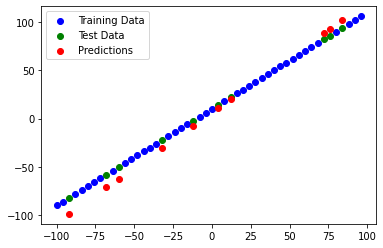

In [54]:
y_pred_3, mae_3, mse_3 = prediction_function(model_3, X_test, y_test)

**OVERFITTING!**

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [55]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
                 

In [56]:
all_results

,model,mae,mse
0,model_1,19.013840,515.959167
1,model_2,8.530996,73.127907
2,model_3,8.269046,87.359283


In [57]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 **Note**: A main goal is to minimise the time between experiments. The more things I figure out that won't work and in turn getting close to figuring our what does. 
Remember the motto is "experiment... experiment... experiment...

## Tracking Experiments

A good habit is to track the results of all experiments. Which can be tedious when running a lot of experiments. However there are tools:

📖 As you build more models, use:
* TensorBoard - a component of the TF library that tracks modelling experiments.
* Weights & Biases - a tool for tracking all kinds of ML experiments and plugs straight into Tensorboard

## Saving & Loading models:
There are 2 main formats:

1. The SavedModel format - the default
2. The HDF5 format - which is used for large file handling.

**Observation** - the second format gives a single file while the first format produces a folder.

Both formats are loaded with the same method: `tf.keras.models.load_model("FILEPATH")`

In [62]:
# SavedModel format
model_2.save("best_model")

In [60]:
# HDF5 format
model_2.save("best_model_HD5_format.h5")

In [61]:
new_model_savedmodel = tf.keras.models.load_model("/content/best_model")

In [64]:
new_model_hdf5 = tf.keras.models.load_model("/content/best_model_HD5_format.h5")

1/1 [==============================] - 0s 114ms/step
The MAE is: 8.530996322631836
The MSE is: 73.1279067993164
1/1 [==============================] - 0s 48ms/step
The MAE is: 8.530996322631836
The MSE is: 73.1279067993164


(array([[-10.633534],
        [ 78.234085],
        [-30.83072 ],
        [  5.524213],
        [-91.42227 ],
        [-67.185646],
        [ 74.19465 ],
        [ 86.31295 ],
        [-59.106777],
        [ 13.603088]], dtype=float32), 8.530996, 73.12791)

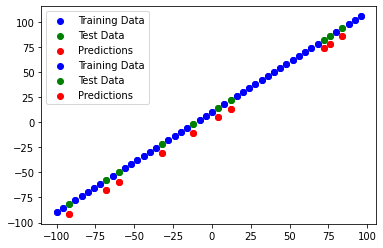

In [65]:

prediction_function (model_2, X_test, y_test)

1/1 [==============================] - 0s 49ms/step
The MAE is: 8.530996322631836
The MSE is: 73.1279067993164


(array([[-10.633534],
        [ 78.234085],
        [-30.83072 ],
        [  5.524213],
        [-91.42227 ],
        [-67.185646],
        [ 74.19465 ],
        [ 86.31295 ],
        [-59.106777],
        [ 13.603088]], dtype=float32), 8.530996, 73.12791)

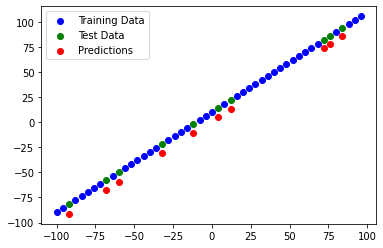

In [66]:
prediction_function (new_model_savedmodel, X_test, y_test)